# Plotly MakePlot
This tutorial is for the plotly MakePlot class available in the TFC utilities. This class is similar to the `MakePlot` class designed for matplotlib, but it uses plotly. The main reason the authors of the TFC python module chooses to use plotly is for 3d plots. In particular, plotly fixes the following issues:

* Matplotlib frequently has issues displaying surfaces correctly when one surface/line eclispes another. 
* Matplotlib cannot linearly interpolate colors on a surface, see [issue here](https://github.com/matplotlib/matplotlib/issues/6027).

Of course, there are disadvantages to using plotly rather than matplotlib as well. The one's the author's of the tfc Python module found in regards to producing plots for TFC are summarized below:

* Plotly cannot render Latex text in 3D, so one must create what they need via HTML.
* Plotly cannot write images to PDF with a transparent background. Therefore, if a transparent background is desired, one must write their images to a PNG (a non-vectorized image format). It should be noted that while one could save their plot as a SVG (a vectorized image format), this is done in plotly by simply saving the image as a PNG and adding it into an SVG container; therefore, the final image will have rasterization-related issues.

Please note that this class is designed to be used in regular Python scripts, and the plots may appear scrunched in these Jupyter notebooks. Let's begin by importing the MakePlot class.

In [1]:
# Needed to display notebooks correctly on ReadTheDocs, but not in normal notebooks or Python scripts.
import plotly.io as pio
pio.renderers.default = "notebook"

import numpy as np
from tfc.utils.PlotlyMakePlot import MakePlot

The MakePlot class is initializied by specifying the relavent axes labels. The x- and y-lables must be specified, and they constitue the only required arguments for the class initialization. Optional keyword parameters allow for the specification of other axes and labels:

* zlabs - Optional keyword argument for specifying z-axis labels. Doing so will force the axes to be 3D.
* titles - Optional keyword argument for specifying the titles.

For example, suppose we wanted a 2D plot with labels x and y. This could be accomplished using: 

In [2]:
p = MakePlot(r'x',r'y')
p.show()

where the show method is used to visualize the plot. 

The shape of the labels provided determines how many and where the subplots will be located; the None value is used to specify that a plot does not exist in that location. For example, suppose that we wanted to split the plotting window into a 2x2 array, but we do not want a plot in the bottom-left.

In [3]:
xlabs = [[r'$x_1$',r'$x_2$'],[None,r'$x_4$']]
ylabs = [[r'$y_1$',r'$y_2$'],[None,r'$y_4$']]
p = MakePlot(xlabs,ylabs)
for row in range(1,3):
    for col in range(1,3):
        if not (row == 2 and col == 1):
            p.Scatter(x=[0],y=[0],mode='lines',row=row,col=col)
p.fig.update_layout(showlegend=False)
p.show()

The PartScreen method was used here to change the size of the plotting window to match the size of the screen.

The MakePlot class provides access to the subfigures and axes via the `row` and `col` arguments that the plotting functions provide. In addition, the axes themselves (labels, ticks, etc.) can be accessed via the fig variable in the MakePlot class, e.g., p.fig.

## Saving figures
The MakePlot class offers a save method to save the figure. The first and only required argument is the file name. This is specified without the file extension. The method comes with two optional keywords:

1. tight - This boolean arguement will crop out the whitespace if the file type is "PDF" or "png." Default is True.
2. fileType - This optional string argument sets the format of the image. The default is PNG. For a list of options, see plotly's [write_image](https://plotly.github.io/plotly.py-docs/generated/plotly.io.write_image.html) documentation.

For example, let's save the figure as a transparent PNG titled "MyFigure."

In [4]:
p.save("MyFigure")

Warning, file type could not be inferred from MyFigure. The file type has been set to png.


## Comparison with matplotlib
As mentioned earlier, the authors tend to choose plotly over matplotlib for 3D plotting. A demonstrative example is given below. 

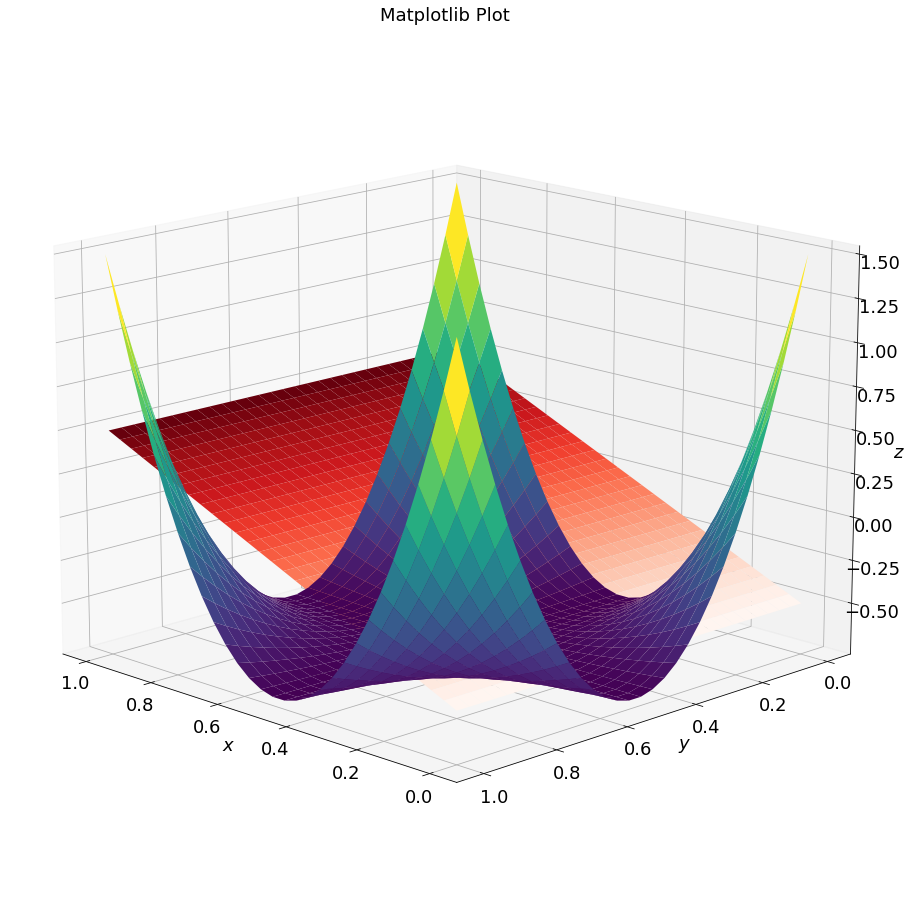

In [5]:
from tfc.utils import MakePlot as MP
from matplotlib import cm

# This line is added for Python notebooks but is not necessary in a regular Python script.
%matplotlib inline 

# Create two 3D surfaces that intersect
x,y = np.meshgrid(np.linspace(0,1,30),np.linspace(0,1,30))
z1 = x-0.5
z2 = (3.*(x-0.5))**2*(2.*(y-0.5))**2-0.75

p = MP(r'$x$',r'$y$',zlabs=r'$z$',titles=r'Matplotlib Plot')
p.ax[0].plot_surface(x,y,z1,cmap=cm.Reds)
p.ax[0].plot_surface(x,y,z2,cmap=cm.viridis)
p.ax[0].view_init(azim=135,elev=15)
p.FullScreen()
p.show()

p1 = MakePlot('x','y',zlabs='z',titles='Plotly plot')
p1.Surface(x=x,y=y,z=z1,colorscale='reds',showscale=False)
p1.Surface(x=x,y=y,z=z2,colorscale='viridis',showscale=False)
p1.view(azimuth=135,elevation=15)
p1.fig['layout']['scene']['aspectmode']='cube'
p1.PartScreen(750,750,units='px')
p1.show()

The above plots show that:

1. Matplotlib does not display the surfaces correctly, as they should intersect as shown in the plotly figure.
2. Matplotlib does not interpolate the colors on the surface. This is clearest when comparing the upper corners of the second surface (z2) to the same plotly surface.